# News_Category_Dataset Analysis

### Yuhao Wang

## 1. Creating A Word Cloud

In [1]:
from collections import defaultdict
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
% matplotlib inline

In [2]:
# data preparation
df = pd.read_json("/Users/apple/Desktop/News_Category_Dataset.json", lines = True)
df["text"] = df.headline + " " + df.short_description
text = " ".join(text for text in df.text)

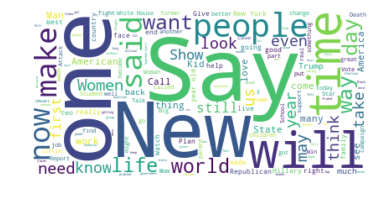

In [3]:
# Create a stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["trump", "donald", "president", "obama", "clinton"])

# Generate a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2. Word Frequency Visualization

In [4]:
# this function is the same as in the NewsCategory.py
def get_ngrams(string, n):
    tmp = string.lower().split()
    new_seq = ["START" for i in range(n-1)] + tmp + ["STOP"]
    res = list()
    for i in range(len(new_seq)-n+1):
        temp = tuple(new_seq[i: i+n])
        res.append(temp)
    return res

In [5]:
unigramcounts = defaultdict(int)
for val in df.text: 
    val = str(val)
    tokens = get_ngrams(val, 1)
    for i in range(len(tokens)):
        unigramcounts[tokens[i]] += 1

In [6]:
labels, values = zip(*unigramcounts.items())

(0, 200)

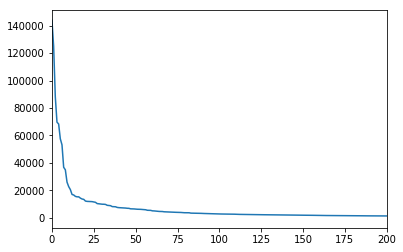

In [7]:
# sort values in descending order
indSort = np.argsort(values)[::-1]

# rearrange values data
values = np.array(values)[indSort]
indexes = np.arange(len(labels))

# draw word frequency in descending order
plt.plot(indexes, values)
plt.xlim(0, 200)

## 3. LDA Analysis

In [33]:
# data preprocessing
tokens = df["text"][0].lower().split()

In [35]:
# create English stop words list
en_stop = get_stop_words('en')
stopped_tokens = [i for i in tokens if not i in en_stop]

The reason why we create a stopped_tokens from original tokens is that some words, like "for", "and", etc., are useless at most time. 

In [36]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

We now created a stemmed_tokens. The idae is that one word can have different kinds of form which is professionally known as morpholigy. Take "interest" for example. It can be either "interesting" or "interested". But the core meaning of it seldom changes and goes with the original "interest". Therefore, it can simplify our work by stemming words.

In [37]:
from gensim import corpora, models
texts = []
texts.append(stemmed_tokens)
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

This step is quite like create a 1-gram model.

In [38]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.063*"week," + 0.063*"2" + 0.063*"kill" + 0.063*"1"'), (1, '0.063*"texa" + 0.063*"day" + 0.063*"america." + 0.063*"mass"')]


Now we built a simple LDA model. And the above are two topics generated based on the first sentence. Then we will loop through the whole df.text which actually consists of 31 topics.

In [41]:
texts = []
for val in df.text:
    tokens = val.lower().split()
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

In [43]:
dictionary = corpora.Dictionary(texts)

In [44]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=20, id2word = dictionary, passes=20)

In [ ]:
print(ldamodel.print_topics(num_topics=8, num_words=4))